# TM10007: Machine learning
## Week 2, lecture 1: Random Forest and Ensembles
#### Author: Martijn P. A. Starmans

In this exercise, you will learn how to use a random forest and ensembles using scikit learn.

For more ensemble methods, see https://scikit-learn.org/stable/modules/ensemble.html . 


In [1]:
!pip install sklearn numpy matplotlib

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# General packages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets as ds

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier


In [3]:
# Some functions we will use
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm
    
def load_breast_cancer(n_features=2):
    '''
    Load the sklearn breast data set, but reduce the number of features with PCA.
    '''
    data = ds.load_breast_cancer()
    x = data['data']
    y = data['target']
    
    p = PCA(n_components=n_features)
    p = p.fit(x)
    x = p.transform(x)
    return x, y

def load_boston(n_features=1):
    '''
    Load the sklearn boston data set, but reduce the number of features with PCA.
    '''
    data = ds.load_boston()
    x = data['data']
    y = data['target']
    
    p = PCA(n_components=n_features)
    p = p.fit(x)
    x = p.transform(x)
    return x, y

def load_diabetes(n_features=1):
    '''
    Load the sklearn bdiabetes data set, but reduce the number of features with PCA.
    '''
    data = ds.load_diabetes()
    x = data['data']
    y = data['target']
    
    p = PCA(n_components=n_features)
    p = p.fit(x)
    x = p.transform(x)
    return x, y

Let us first create again three example datasets to play with and plot the feature distributions
in scatter plots.

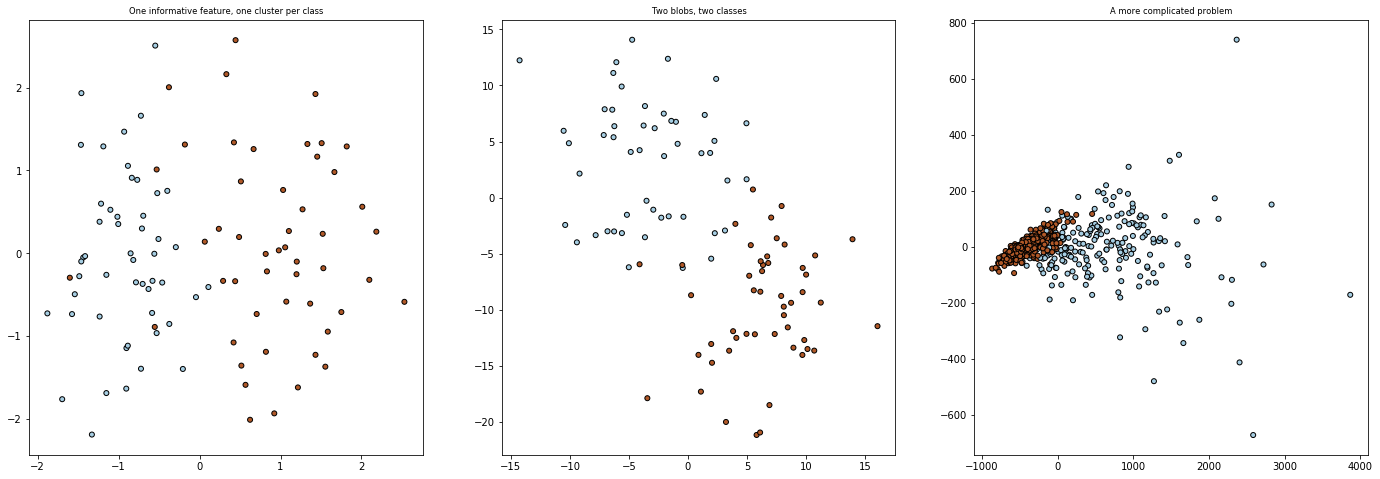

In [4]:
# Load and plot three different classification datasets
X2, Y2 = ds.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                n_informative=1,
                                n_clusters_per_class=1)
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131)
ax.set_title("One informative feature, one cluster per class", fontsize='small')
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k', cmap=plt.cm.Paired)

X3, Y3 = ds.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5)
ax = fig.add_subplot(132)
ax.set_title("Two blobs, two classes", fontsize='small')
ax.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k', cmap=plt.cm.Paired)

X4, Y4 = load_breast_cancer()
ax = fig.add_subplot(133)
ax.set_title("A more complicated problem", fontsize='small')
ax.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k', cmap=plt.cm.Paired)

Previously, we have seen how sklearn can be used to fit and test a classifier on these datasets using both
decision trees and a nearest neighbors classifiers. Now, we are going to see how we can use and evaluate
random forest and ensemble approaches.

**Random Forest** 
A random forest mostly consists of bagging of multiple decision trees. As sklearns provides a BaggingClassifier,
we can manually replicate a random forest using this approach. Note that you can in general use bagging with any classifier.

**Ensembling**
We have seen multiple ensembling strategies, including voting. Sklearn provides a voting ensemble through the
VotingClassifier object, in which you can insert any number of any classifiers you want. You can use hard
voting to give a binary outcome, or soft voting to give a probability score, see the documentation

Let's compare the previously used classifiers with our new classifiers.

/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


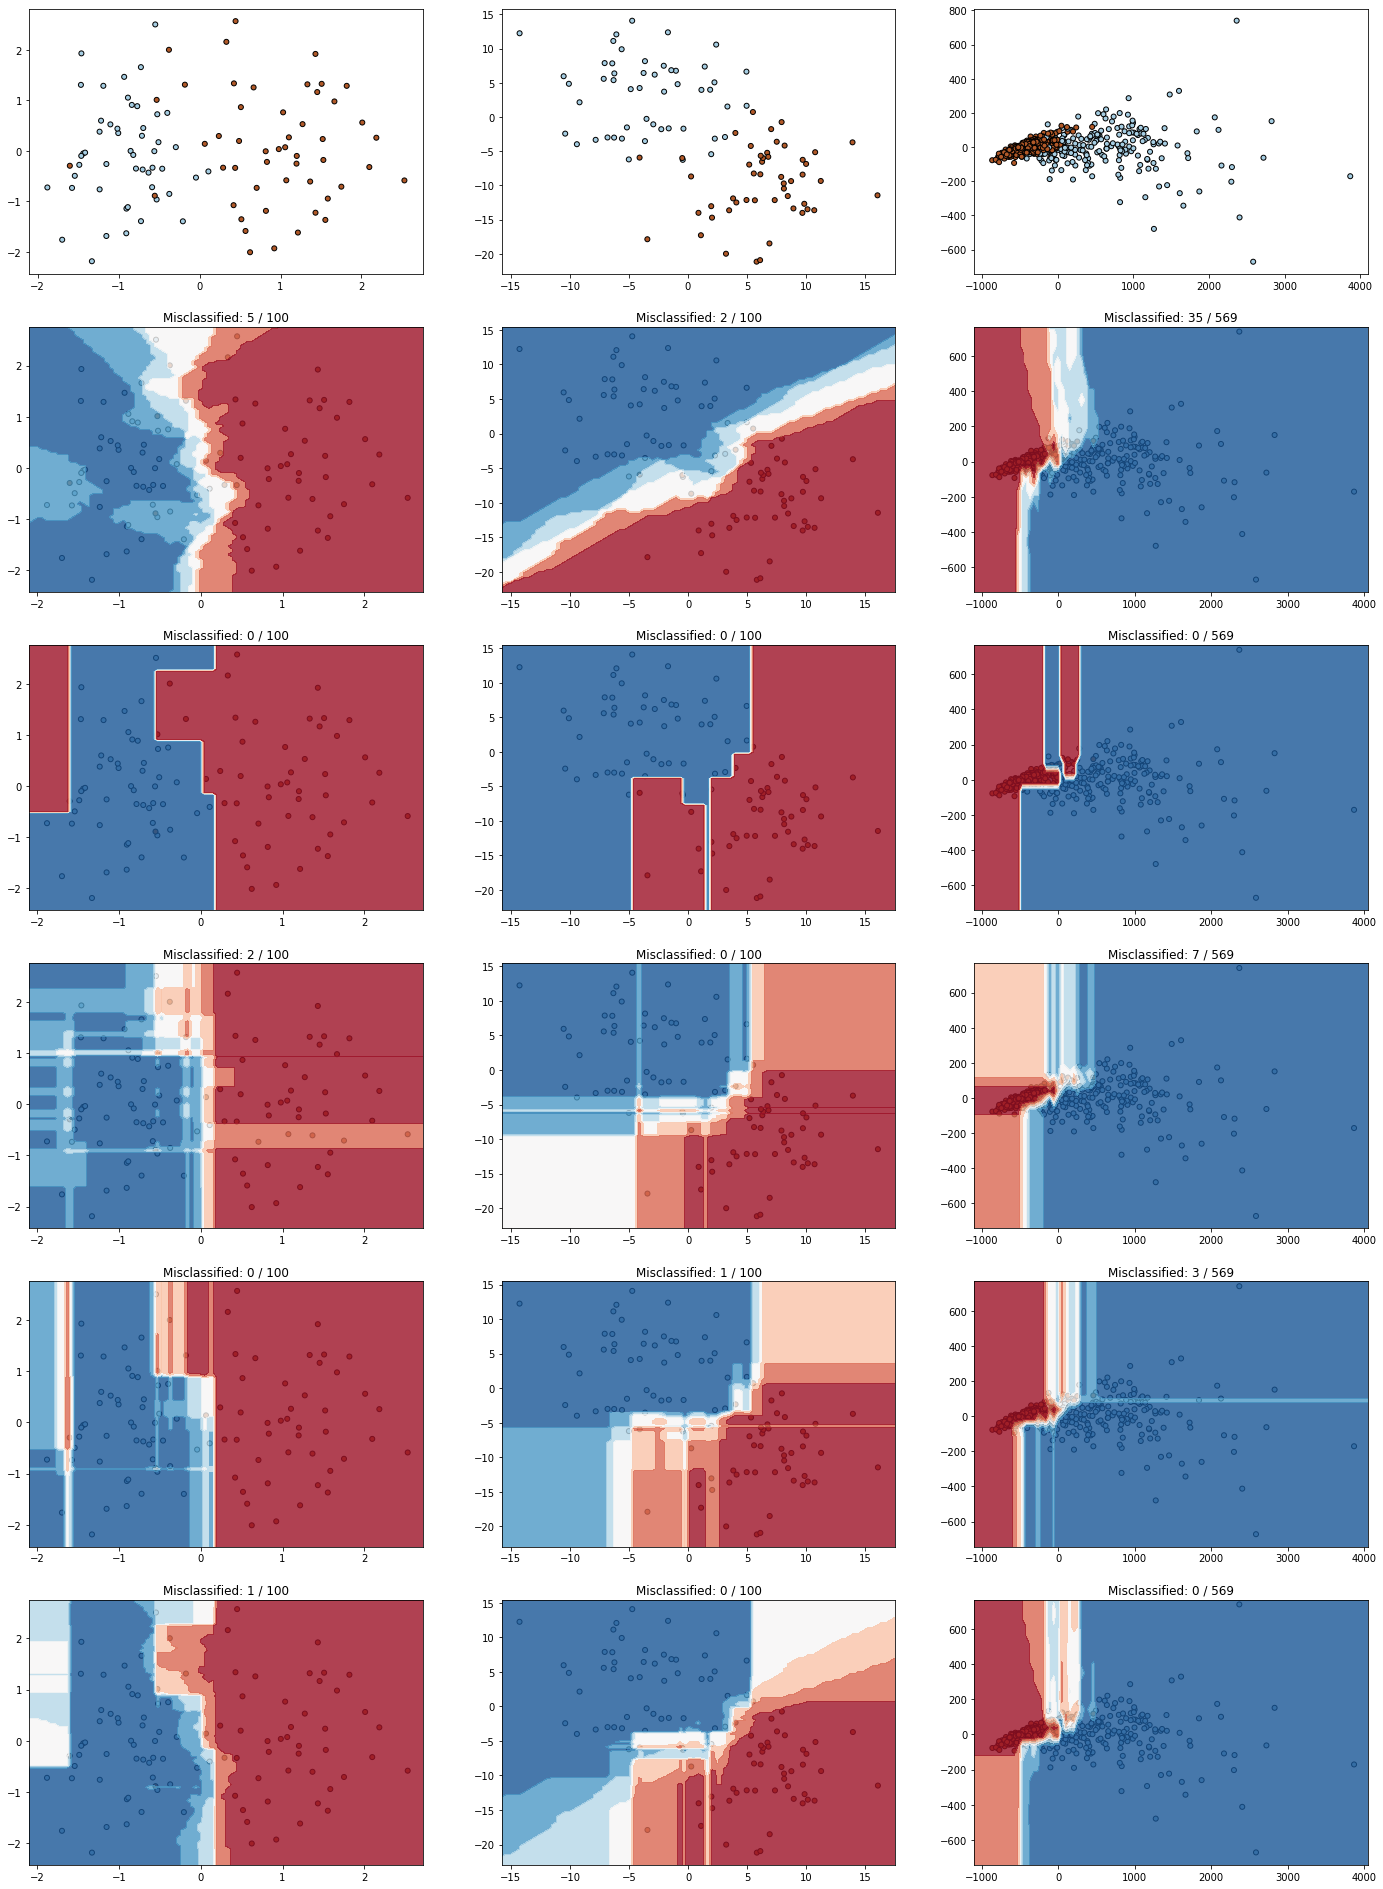

In [5]:
# Construct classifiers
homemade_random_forest = BaggingClassifier(DecisionTreeClassifier())
voting_ensemble = VotingClassifier(
    estimators=[('KNN', KNeighborsClassifier()), ('tree', DecisionTreeClassifier()), ('rf', RandomForestClassifier())],
    voting='soft')
clsfs = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
         homemade_random_forest, voting_ensemble]


# Create lists of datasets to loop over
Xs = [X2, X3, X4]
Ys = [Y2, Y3, Y4]

# First make plot without classifiers:
num = 0
fig = plt.figure(figsize=(24,8*len(clsfs)))
for X, Y in zip(Xs, Ys):
    ax = fig.add_subplot(7, 3, num + 1)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
        s=25, edgecolor='k', cmap=plt.cm.Paired)
    num += 1
    
# Now use the classifiers on all datasets
for clf in clsfs:
    for X, Y in zip(Xs, Ys):
        Xtrain, 
        clf.fit(X, Y)
        ax = fig.add_subplot(7, 3, num + 1)
        ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k', cmap=plt.cm.Paired)
        colorplot(clf, ax, X[:, 0], X[:, 1])
        y_pred = clf.predict(X)
        t = ("Misclassified: %d / %d" % ((Y != y_pred).sum(), X.shape[0]))
        ax.set_title(t)
        num += 1
        
# Note: you may get a FutureWarning, which you can for now just ignore

As the datasets used are randomly generated, these plots will look slightly different every time you run this notebook. You can immediately recognize the tree based plots (how?). Besides differences in performance, some classifiers may show a similar performance, but totally different decision boundaries. How do these relate to the type of classifier?

## Hyperparameters
In the previous exercise, we have seen a bunch of different classifiers, which we all initialized with the default parameters. However, all of them, including the random forest, bagging, and voting classifier, include various hyperparameters. These may greatly effect the performance.

Let us first look at the parameters of the random forest. The sklearn random forest has 19 (!) different parameters you can set. Here, we will only look into three of these, but you may want to check the others out for the exercises.

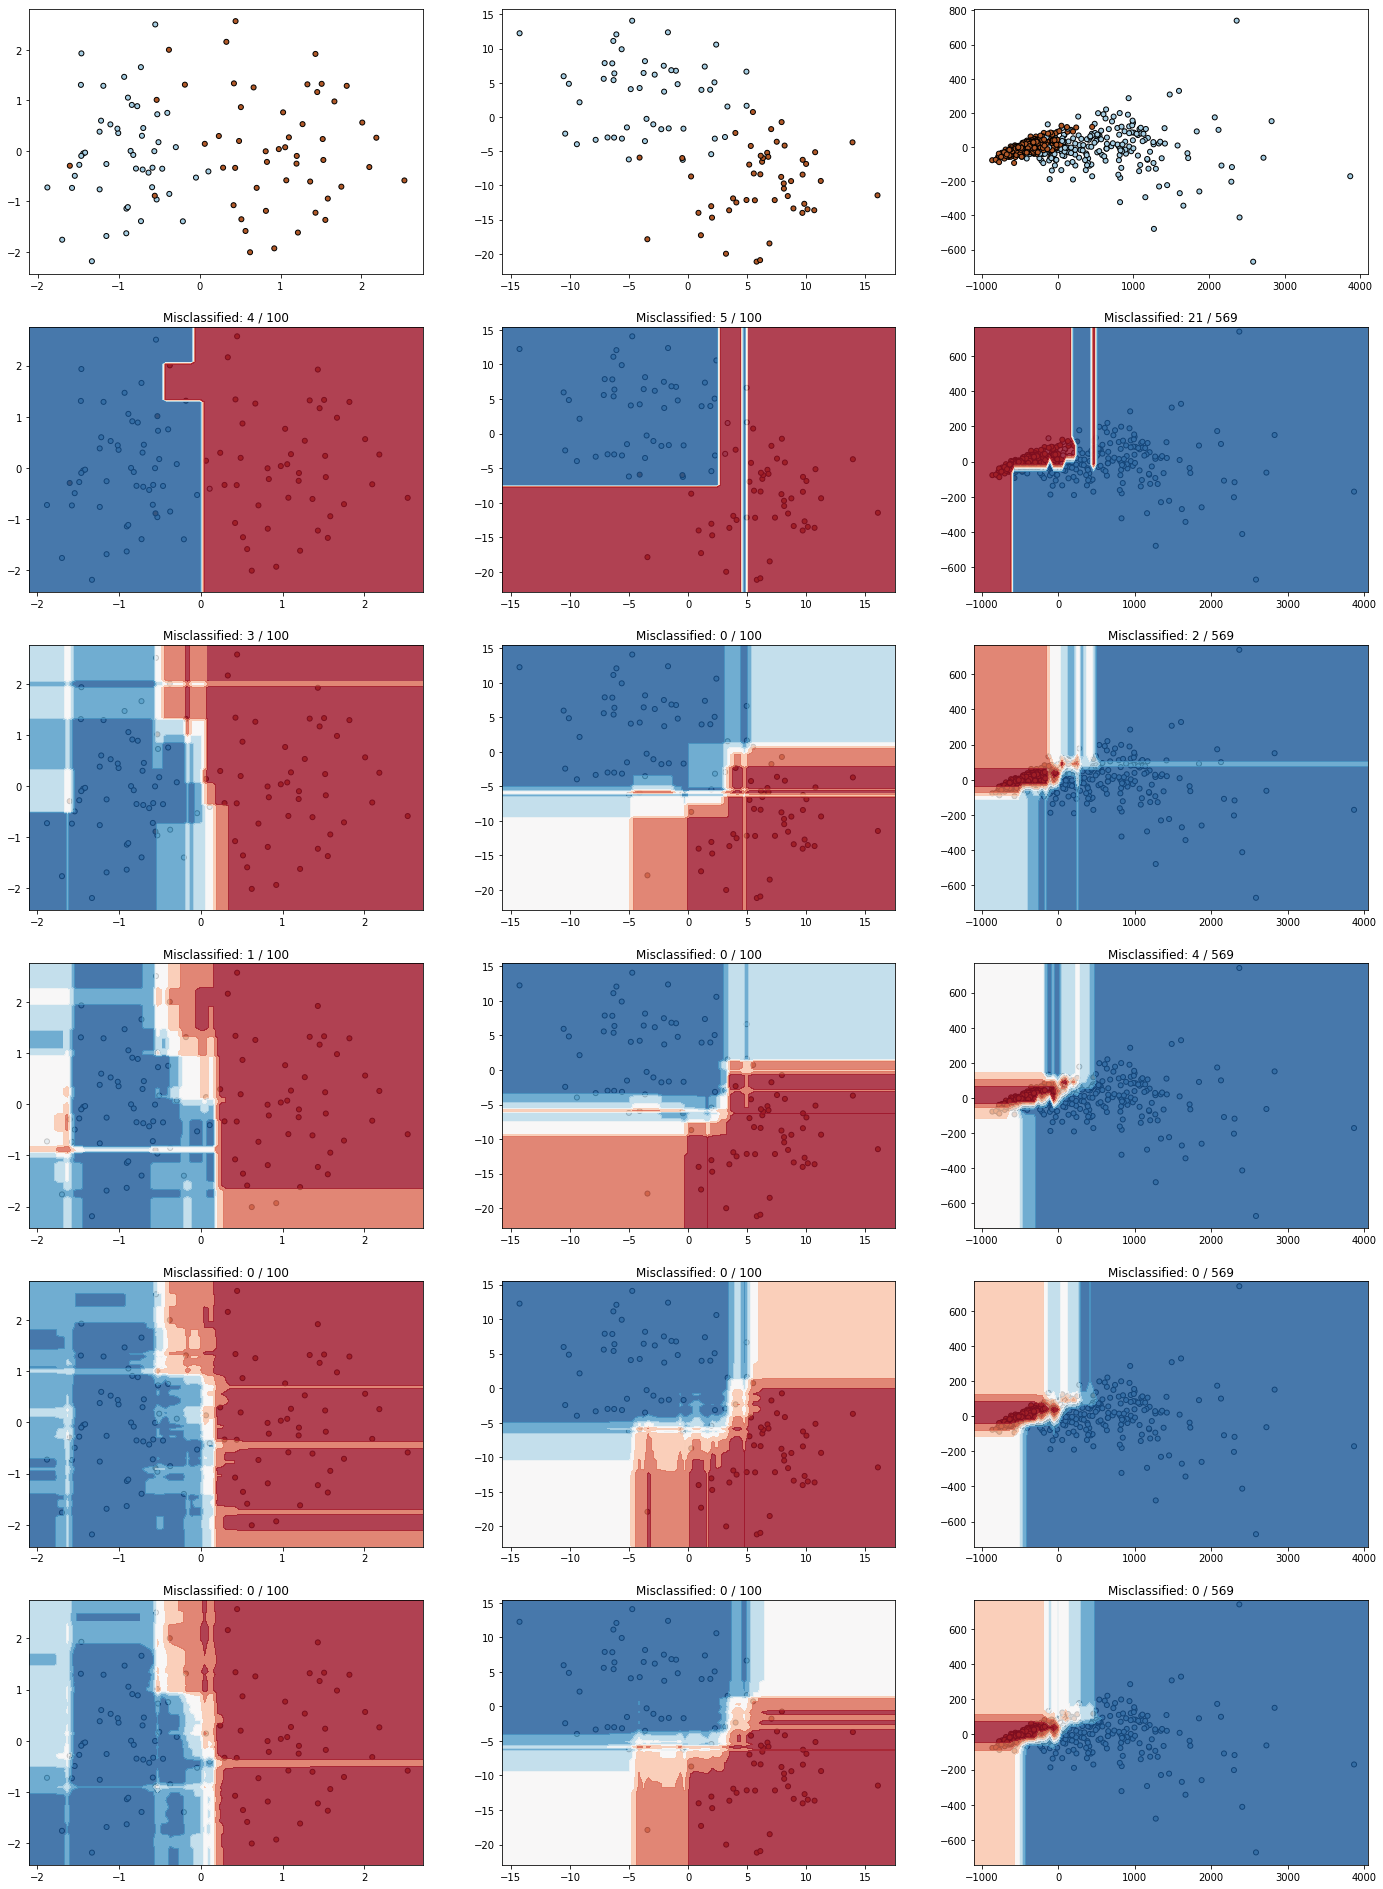

In [6]:
# Let us first see how much of a difference the number of trees, n_estimators, makes
n_trees = [1, 5, 10, 50, 100]

# First make plot without classifiers:
num = 0
fig = plt.figure(figsize=(24,8*len(clsfs)))
for X, Y in zip(Xs, Ys):
    ax = fig.add_subplot(7, 3, num + 1)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
        s=25, edgecolor='k', cmap=plt.cm.Paired)
    num += 1
    
# Now use the classifiers on all datasets
for n_tree in n_trees:
    for X, Y in zip(Xs, Ys):
        clf = RandomForestClassifier(n_estimators=n_tree)
        clf.fit(X, Y)
        ax = fig.add_subplot(7, 3, num + 1)
        ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k', cmap=plt.cm.Paired)
        colorplot(clf, ax, X[:, 0], X[:, 1])
        y_pred = clf.predict(X)
        t = ("Misclassified: %d / %d" % ((Y != y_pred).sum(), X.shape[0]))
        ax.set_title(t)
        num += 1


With only one tree, you are basically using a decision tree classifier. Multiple trees increases the complexity of the model, effectively giving it more degrees of freedom to use. While this may result in a better decision boundary, this may also result in overfitting. At some point, increasing the number of trees will not substantially alter the results anymore.

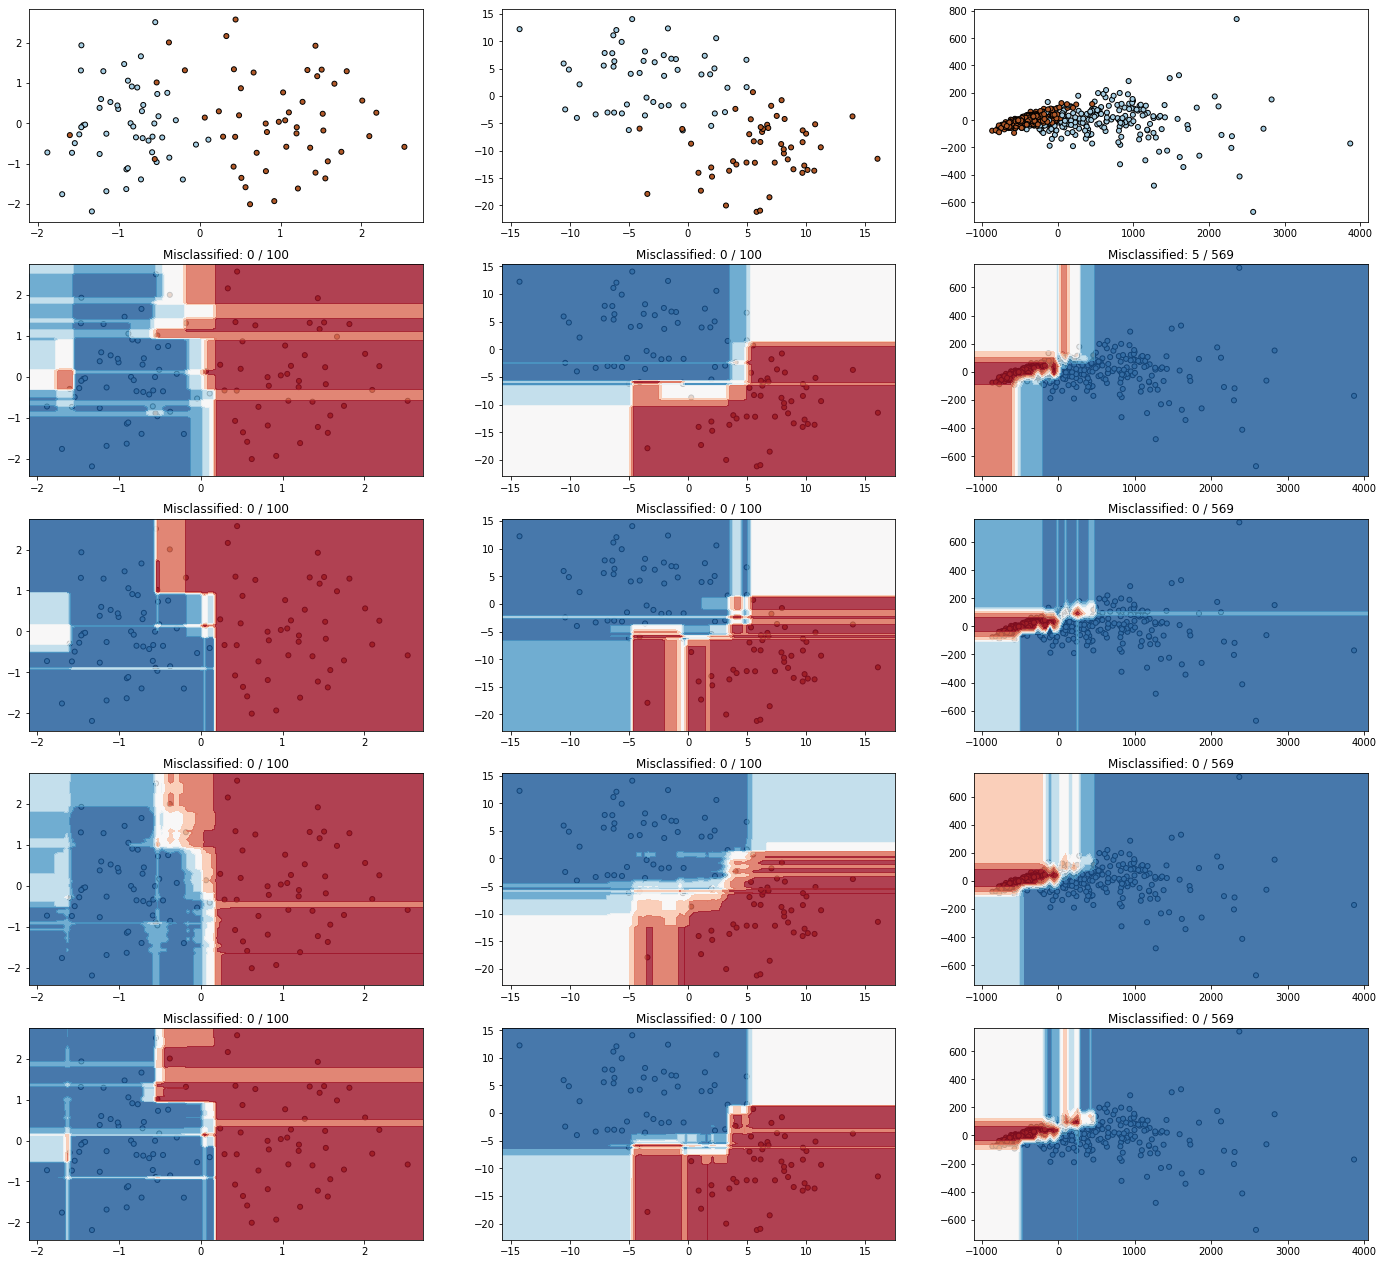

In [7]:
# Next, let us try to see how bootstrapping influences the process.
# Let us first see how much of a difference the number of trees, n_estimators, makes
clsfs = [RandomForestClassifier(n_estimators=5, bootstrap=True),
         RandomForestClassifier(n_estimators=5, bootstrap=False),
         RandomForestClassifier(n_estimators=50, bootstrap=True),
         RandomForestClassifier(n_estimators=50, bootstrap=False)]

# First make plot without classifiers:
num = 0
fig = plt.figure(figsize=(24,8*len(clsfs)))
for X, Y in zip(Xs, Ys):
    ax = fig.add_subplot(7, 3, num + 1)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
        s=25, edgecolor='k', cmap=plt.cm.Paired)
    num += 1
    
# Now use the classifiers on all datasets
for clf in clsfs:
    for X, Y in zip(Xs, Ys):
        clf.fit(X, Y)
        ax = fig.add_subplot(7, 3, num + 1)
        ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k', cmap=plt.cm.Paired)
        colorplot(clf, ax, X[:, 0], X[:, 1])
        y_pred = clf.predict(X)
        t = ("Misclassified: %d / %d" % ((Y != y_pred).sum(), X.shape[0]))
        ax.set_title(t)
        num += 1


Both with a small number of trees and a large number, bootstrapping makes quite a difference on the decision boundary, but not neccesary on the performance. How to interpret these results? Would you always use bootstrapping or not?

/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/martijn/Documents/VEKTML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


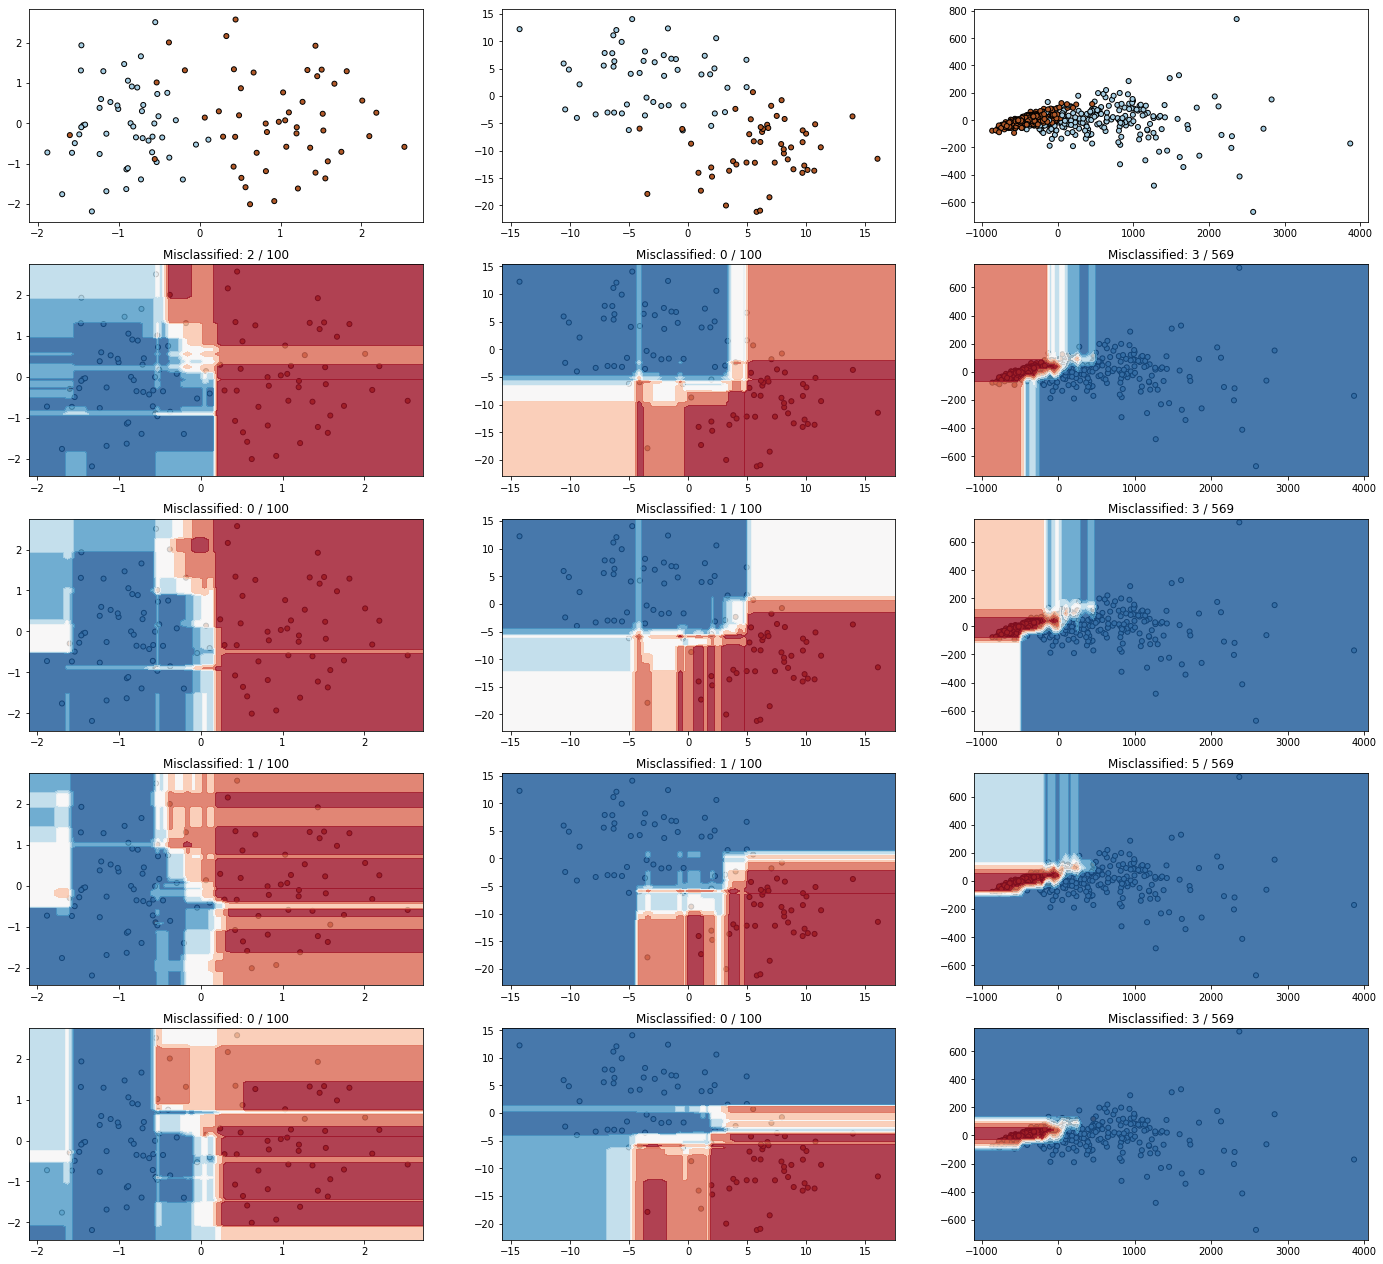

In [8]:
# Lastly, if you have an imbalance in your dataset, or one class is more important than the other, you may want
# to alter the class weigh in the random forest.
clsfs = [RandomForestClassifier(class_weight={0: 1, 1: 0.001}),
         RandomForestClassifier(class_weight={0: 1, 1: 1}),
         RandomForestClassifier(class_weight={0: 1, 1: 10}),
         RandomForestClassifier(class_weight={0: 1, 1: 100})]

# First make plot without classifiers:
num = 0
fig = plt.figure(figsize=(24,8*len(clsfs)))
for X, Y in zip(Xs, Ys):
    ax = fig.add_subplot(7, 3, num + 1)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
        s=25, edgecolor='k', cmap=plt.cm.Paired)
    num += 1
    
# Now use the classifiers on all datasets
for clf in clsfs:
    for X, Y in zip(Xs, Ys):
        clf.fit(X, Y)
        ax = fig.add_subplot(7, 3, num + 1)
        ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k', cmap=plt.cm.Paired)
        colorplot(clf, ax, X[:, 0], X[:, 1])
        y_pred = clf.predict(X)
        t = ("Misclassified: %d / %d" % ((Y != y_pred).sum(), X.shape[0]))
        ax.set_title(t)
        num += 1


You can see that according to the class balance, the ratio between the areas wich are classified as 1/0 (blue/red) is changed.

## Feature Importance
In the lecture, we have seen that a random forest has a natural form of feature selection and feature importance. Hence, you may use this feature to find out which features have the most predictive value. However, as we also saw, the results may not be straight-forward to interpret, e.g. due to redundant features. Let us therefore create a dataset with 10 features, of which three are actually informative, and two are redundant, and observer the feature importance

Feature ranking:
1. feature 0 (0.257905)
2. feature 7 (0.186814)
3. feature 4 (0.182428)
4. feature 6 (0.150675)
5. feature 5 (0.085810)
6. feature 2 (0.028808)
7. feature 8 (0.028062)
8. feature 1 (0.027824)
9. feature 9 (0.025892)
10. feature 3 (0.025781)


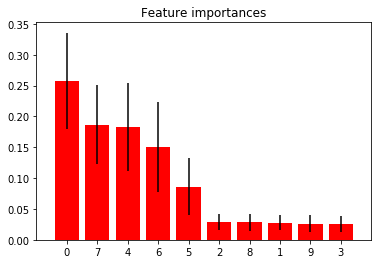

In [9]:
# This example is adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Build a classification task using 3 informative features
X, y = ds.make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=2,
                           n_repeated=0,
                           n_classes=2)

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=100)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

As the dataset and the random forest include some random effects, your result will change every time you run the code block above. However, you will always observer similar patterns. The plot shows that five of the features contain some importance. It may be able to clearly seperate the three informative from the two redundant features, but in some cases, this might not be obvious. Hence, be careful in usage of this method.